In [2]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import calculate_log as callog
import torch

%matplotlib inline

In [4]:
class opt:
    outf = 'extracted_features'
    backbone_name = 'resnet18_vanilla_simclr_cifar10'
    dataset ='cifar10'
    fet = '_mean'
    fet2 = '_mean'

In [5]:
ood_dataset=['svhn','lsun_resize','imagenet_resize'] 
# ood_dataset = ['cifa r10']
out_dataset=ood_dataset
num_out_datasets = len(ood_dataset)

In [6]:
ind_dataset=opt.dataset
experiment = opt.backbone_name
ae_type = 'vanilla_AE'
prefix = 'confidence' #confidence

layer_num=9
epoch=1000
ind=[]
ind_train=[]
ood=dict()
for i in range(layer_num):
    print(i)
    ood[i]=[]
    ind.append(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_in_{}_epoch_{}{}.txt'.format(prefix, i,ind_dataset,epoch, opt.fet))))
    ind_train.append(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_in_{}_epoch_{}{}_train.txt'.format(prefix, i,ind_dataset,epoch, opt.fet))))
    for j in range(len(ood_dataset)):
        ood[i].append(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_out_{}_epoch_{}{}_model1.txt'.format(prefix, i,ood_dataset[j],epoch, opt.fet))))

0
1
2
3
4
5
6
7
8


In [7]:
from sklearn.preprocessing import StandardScaler
ind_scaled=[]
ood_scaled=dict()
for j in range(len(ood_dataset)):
    ood_scaled[j]=[]

for i in range(layer_num):
    scaler=StandardScaler()
    scaler.fit(ind_train[i].reshape(-1,1))
    ind_scaled.append(scaler.transform(ind[i].reshape(-1,1)).reshape(-1))
    for j in range(len(ood_dataset)):
        ood_scaled[j].append(scaler.transform(ood[i][j].reshape(-1,1)).reshape(-1))

In [8]:
ind_scaled_max=np.min(ind_scaled,0)
ood_scaled_max=[]
for j in range(len(ood_dataset)):
    ood_scaled_max.append(np.min(ood_scaled[j],0))

In [10]:
ood_index=  0
print(ood_dataset[ood_index])
results_max,_,_ = callog.metric(ind_scaled_max,ood_scaled_max[ood_index])
print(results_max)

ood_index=  1
print(ood_dataset[ood_index])
results_max,_,_ = callog.metric(ind_scaled_max,ood_scaled_max[ood_index])
print(results_max)

ood_index=  2
print(ood_dataset[ood_index])
results_max,_,_ = callog.metric(ind_scaled_max,ood_scaled_max[ood_index])
print(results_max)

# ood_index=  3
# print(ood_dataset[ood_index])
# results_max,_,_ = callog.metric(ind_scaled_max,ood_scaled_max[ood_index])
# print(results_max)

# ood_index=  4
# print(ood_dataset[ood_index])
# results_max,_,_ = callog.metric(ind_scaled_max,ood_scaled_max[ood_index])
# print(results_max)


# rst = results_max['TMP']
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
# print("{:.2f} / {:.2f} / {:.2f}".format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC']))
# plt.text(np.max((np.max(-ind_scaled_max),np.max(-ood_scaled_max[ood_index]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)

svhn
{'TMP': {'TNR': 0.9146051014136447, 'AUROC': 0.9819624193300553, 'DTACC': 0.9370649047326367, 'AUIN': 0.9643787005520832, 'AUOUT': 0.9916078876236122}}
lsun_resize
{'TMP': {'TNR': 0.9417, 'AUROC': 0.9888144200000001, 'DTACC': 0.9470000000000001, 'AUIN': 0.9886479537901767, 'AUOUT': 0.989372236811795}}
imagenet_resize
{'TMP': {'TNR': 0.9184, 'AUROC': 0.9828165000000001, 'DTACC': 0.9349, 'AUIN': 0.9810357408925581, 'AUOUT': 0.9848275210948412}}


Text(0.5, 0, 'Reconstruction Error per layer')

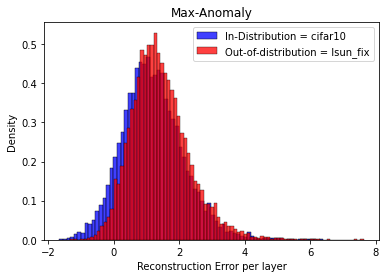

In [39]:
ood_index=  1
sns.histplot(data=-ind_scaled_max,color='blue',stat='density')
sns.histplot(data=-ood_scaled_max[ood_index],color='red',stat='density')
plt.legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
plt.title('Max-Anomaly')
plt.xlabel('Reconstruction Error per layer')



{'TMP': {'TNR': 0.017248002458512546, 'AUROC': 0.3509662914874001, 'DTACC': 0.5000271358328211, 'AUIN': 0.2097723950643531, 'AUOUT': 0.6329664405062039}}
{'TMP': {'TNR': 0.004302397049784856, 'AUROC': 0.1538469844806392, 'DTACC': 0.5000844499078058, 'AUIN': 0.16645868757179086, 'AUOUT': 0.5467007328233713}}
{'TMP': {'TNR': 0.002035955746773177, 'AUROC': 0.14373449984634296, 'DTACC': 0.5, 'AUIN': 0.1650681634812925, 'AUOUT': 0.5417485657785863}}
{'TMP': {'TNR': 0.0687231100184389, 'AUROC': 0.5294876536570375, 'DTACC': 0.529187062077443, 'AUIN': 0.2921867798386, 'AUOUT': 0.7451393680885374}}
{'TMP': {'TNR': 0.09526736324523666, 'AUROC': 0.5911729294714198, 'DTACC': 0.5622929010448678, 'AUIN': 0.3692562283954429, 'AUOUT': 0.7787400793027727}}
{'TMP': {'TNR': 0.2733558696988322, 'AUROC': 0.7811442916410571, 'DTACC': 0.7047682851874615, 'AUIN': 0.6301118212787109, 'AUOUT': 0.8914354089287847}}
{'TMP': {'TNR': 0.28415027658266745, 'AUROC': 0.8027827174247081, 'DTACC': 0.7246177320221266, 'AU

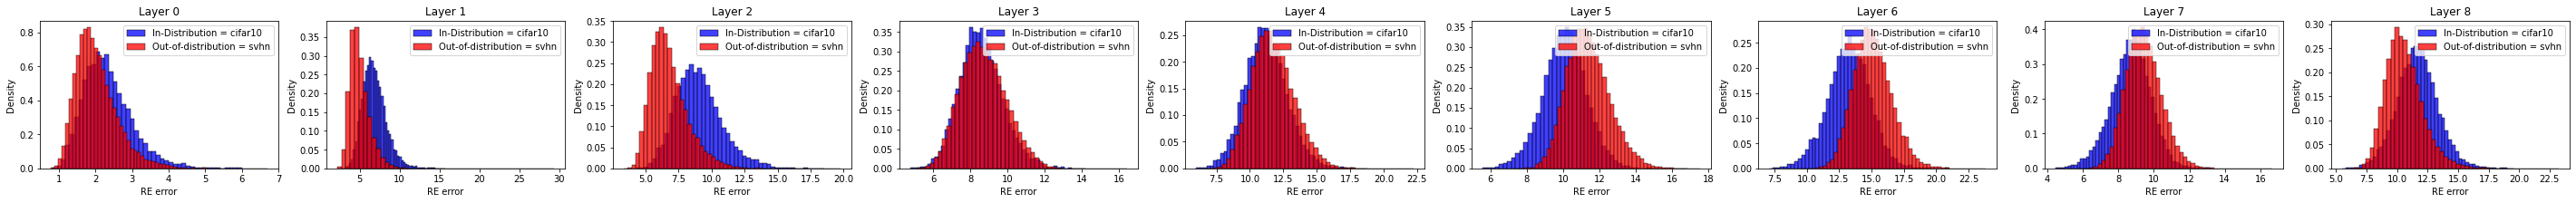

In [42]:
ood_index=0
fig,axs=plt.subplots(1,layer_num,figsize=(50,3))
results=dict()
for layer in range(layer_num):
    results[layer],_,_ = callog.metric(ind[layer],ood[layer][ood_index])
    print(results[layer])
    sns.histplot(ax=axs[layer],data=-ind[layer],color='blue',stat='density',bins=50)
    sns.histplot(ax=axs[layer],data=-ood[layer][ood_index],color='red',stat='density',bins=50)
    axs[layer].legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
    axs[layer].set_title('Layer '+str(layer))
    axs[layer].set_xlabel('RE error')

In [44]:
train_ind_feature=dict()
test_ind_feature=dict()
test_ood_feature=dict()
num_ood=dict()

for i in range(layer_num+3):
    test_ood_feature[i]=[]
    num_ood[i]=[]
    train_ind_feature[i]=np.load(os.path.join(opt.outf,opt.backbone_name,'Features_from_layer_'+str(i)+'_'+opt.dataset+opt.fet2+'_train_ind.npy'))
    test_ind_feature[i]=np.load(os.path.join(opt.outf,opt.backbone_name,'Features_from_layer_'+str(i)+'_'+opt.dataset+opt.fet2+'_test_ind.npy'))
    print(num_out_datasets)
    for j in range(num_out_datasets):
        test_ood_feature[i].append(np.load(os.path.join(opt.outf,opt.backbone_name,'Features_from_layer_'+str(i)+'_'+out_dataset[j]+opt.fet2+'_test_ood.npy')))
        num_ood[i].append(test_ood_feature[i][j].shape[0])
train_data_ind = train_ind_feature
test_data_ind = test_ind_feature
test_data_ood = test_ood_feature
for i in range(layer_num+3):
    print(train_data_ind[i].shape)

5
5
5
5
5
5
5
5
5
5
5
5
(50000, 64)
(50000, 64)
(50000, 64)
(50000, 128)
(50000, 128)
(50000, 256)
(50000, 256)
(50000, 512)
(50000, 512)
(50000, 512)
(50000, 2048)
(50000, 128)


In [45]:
train_ind_norm=dict()
test_ind_norm=dict()
test_ood_norm=dict()

for i in range(layer_num+3):
    layer=i
#     layer=layer_num-1
    test_ood_norm[i]=[]
    num_ood[i]=[]
    train_ind_norm[i]=np.linalg.norm(train_ind_feature[layer],axis=1)
    test_ind_norm[i]=np.linalg.norm(test_ind_feature[layer],axis=1)
    print(num_out_datasets)
    for j in range(num_out_datasets):
        test_ood_norm[i].append(np.linalg.norm(test_ood_feature[layer][j],axis=1))

5
5
5
5
5
5
5
5
5
5
5
5


In [8]:
ind_train_nn=dict()
ind_nn=dict()
ood_nn=dict()
# fig,axs=plt.subplots(len(ood_dataset),layer_num,figsize=(50,25))
for layer in range(layer_num):
    ind_train_dist = torch.cdist(torch.Tensor(train_ind_feature[layer]), torch.Tensor(train_ind_feature[layer]), p=2)
    ind_train_nn[layer], _ = torch.min(ind_train_dist + torch.eye(ind_train_dist.size(0)) * 1e7, dim=1)
    ind_dist = torch.cdist(torch.Tensor(test_ind_feature[layer]), torch.Tensor(train_ind_feature[layer]), p=2)
    ind_nn[layer], _ = torch.min(ind_dist, dim=1)
    ood_nn[layer]=dict()
    for ood_index in range(len(ood_dataset)):
        ood_dist = torch.cdist(torch.Tensor(test_ood_feature[layer][ood_index]), torch.Tensor(train_ind_feature[layer]), p=2)        
        ood_nn[layer][ood_index], _ = torch.min(ood_dist, dim=1)
        print(layer, ood_index)

0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
2 0
2 1
2 2
2 3
2 4
3 0
3 1
3 2
3 3
3 4
4 0
4 1
4 2
4 3
4 4
5 0
5 1
5 2
5 3
5 4
6 0
6 1
6 2
6 3
6 4
7 0
7 1
7 2
7 3
7 4
8 0
8 1
8 2
8 3
8 4


{'TMP': {'TNR': 0.5850107559926245, 'AUROC': 0.882292217271051, 'DTACC': 0.8071638598647818, 'AUIN': 0.7317337874682361, 'AUOUT': 0.9528038794367647}}
{'TMP': {'TNR': 0.9819837123540258, 'AUROC': 0.9953821373693914, 'DTACC': 0.974771204671174, 'AUIN': 0.9857814845189221, 'AUOUT': 0.9983333254494065}}
{'TMP': {'TNR': 0.977719729563614, 'AUROC': 0.994464582052858, 'DTACC': 0.9710431776275352, 'AUIN': 0.982838774675611, 'AUOUT': 0.9980098309729984}}
{'TMP': {'TNR': 0.9208282114320836, 'AUROC': 0.9790483097725875, 'DTACC': 0.9356226490473264, 'AUIN': 0.9321441524128704, 'AUOUT': 0.9924095230647917}}
{'TMP': {'TNR': 0.8952443146896127, 'AUROC': 0.9721139174861709, 'DTACC': 0.924322126613399, 'AUIN': 0.9092893773643247, 'AUOUT': 0.9897030964722953}}
{'TMP': {'TNR': 0.6108251382913337, 'AUROC': 0.9146766979102644, 'DTACC': 0.8497754456054089, 'AUIN': 0.8070327155951108, 'AUOUT': 0.9562722969519305}}
{'TMP': {'TNR': 0.46792409342347885, 'AUROC': 0.8969014827904117, 'DTACC': 0.833430946527351, 

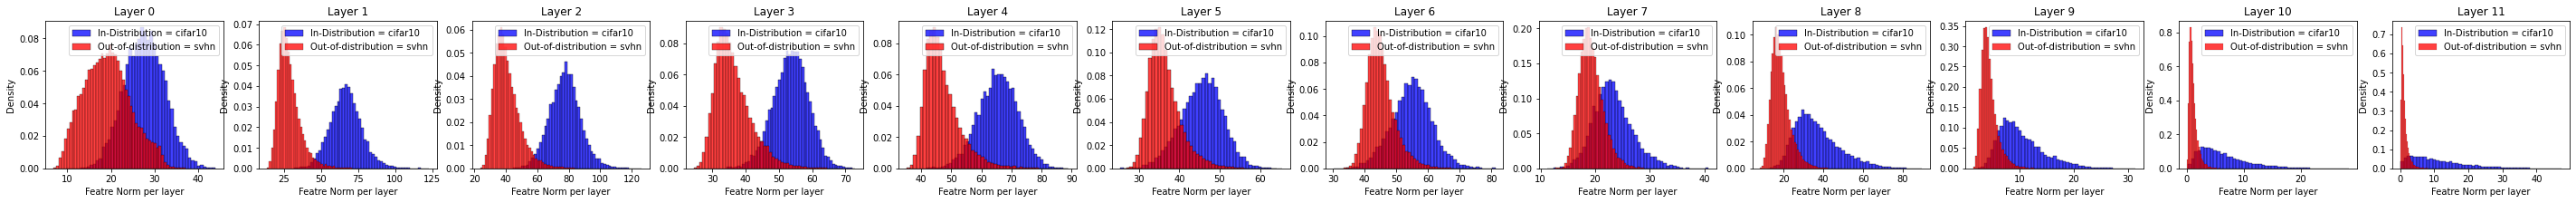

In [49]:
ood_index=0
fig,axs=plt.subplots(1,layer_num+3,figsize=(50,3))
results=dict()
for layer in range(layer_num+3):
    results[layer],_,_ = callog.metric(test_ind_norm[layer],test_ood_norm[layer][ood_index])
    print(results[layer])
    sns.histplot(ax=axs[layer],data=test_ind_norm[layer],color='blue',stat='density',bins=50)
    sns.histplot(ax=axs[layer],data=test_ood_norm[layer][ood_index],color='red',stat='density',bins=50)
    axs[layer].legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
    axs[layer].set_title('Layer '+str(layer))
    axs[layer].set_xlabel('Featre Norm per layer')

In [10]:
# ind_train_nn=dict()
# ind_nn=dict()
# ood_nn=dict()
# # fig,axs=plt.subplots(len(ood_dataset),layer_num,figsize=(50,25))
# for layer in range(layer_num):
#     ind_train_dist = torch.cdist(torch.Tensor(train_ind_feature[layer]), torch.Tensor(train_ind_feature[layer]), p=2)
#     ind_train_nn[layer], _ = torch.min(ind_train_dist + torch.eye(ind_train_dist.size(0)) * 1e7, dim=1)
#     ind_dist = torch.cdist(torch.Tensor(test_ind_feature[layer]), torch.Tensor(train_ind_feature[layer]), p=2)
#     ind_nn[layer], _ = torch.min(ind_dist, dim=1)
#     ood_nn[layer]=dict()
#     for ood_index in range(len(ood_dataset)):
#         print(layer, ood_index)
#         ood_dist = torch.cdist(torch.Tensor(test_ood_feature[layer][ood_index]), torch.Tensor(train_ind_feature[layer]), p=2)        
#         ood_nn[layer][ood_index], _ = torch.min(ood_dist, dim=1)
# #         sns.histplot(ax=axs[ood_index][layer],data=ind_train_nn,color='green')
# #         sns.histplot(ax=axs[ood_index][layer],data=ind_nn,color='blue')
# #         sns.histplot(ax=axs[ood_index][layer],data=ood_nn,color='red')
# #         axs[ood_index][layer].legend(['In-train-Distribution = {}'.format(opt.dataset), 'In-Distribution = {}'.format(opt.dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
# #         axs[ood_index][layer].set_title('Layer '+str(layer))
# #         axs[ood_index][layer].set_xlabel('Distance to NN')

{'TMP': {'TNR': 0.0252, 'AUROC': 0.49421130999999996, 'DTACC': 0.5345, 'AUIN': 0.5497213546849022, 'AUOUT': 0.4720761281072641}}
{'TMP': {'TNR': 0.029000000000000026, 'AUROC': 0.53803491, 'DTACC': 0.55755, 'AUIN': 0.5964151093447017, 'AUOUT': 0.49790507068866635}}
{'TMP': {'TNR': 0.03810000000000002, 'AUROC': 0.5960125600000001, 'DTACC': 0.5902, 'AUIN': 0.6464592796565045, 'AUOUT': 0.5383370173929349}}
{'TMP': {'TNR': 0.057499999999999996, 'AUROC': 0.6707160999999999, 'DTACC': 0.6443, 'AUIN': 0.7226551512638388, 'AUOUT': 0.5970673199252805}}
{'TMP': {'TNR': 0.06230000000000002, 'AUROC': 0.6722431, 'DTACC': 0.6475, 'AUIN': 0.729171250613157, 'AUOUT': 0.5982574503460208}}
{'TMP': {'TNR': 0.07640000000000002, 'AUROC': 0.6997955, 'DTACC': 0.6576000000000001, 'AUIN': 0.7483254750997593, 'AUOUT': 0.6285133455138814}}
{'TMP': {'TNR': 0.10360000000000003, 'AUROC': 0.7123476900000001, 'DTACC': 0.6627000000000001, 'AUIN': 0.7532495996960733, 'AUOUT': 0.6477392949904943}}
{'TMP': {'TNR': 0.103999

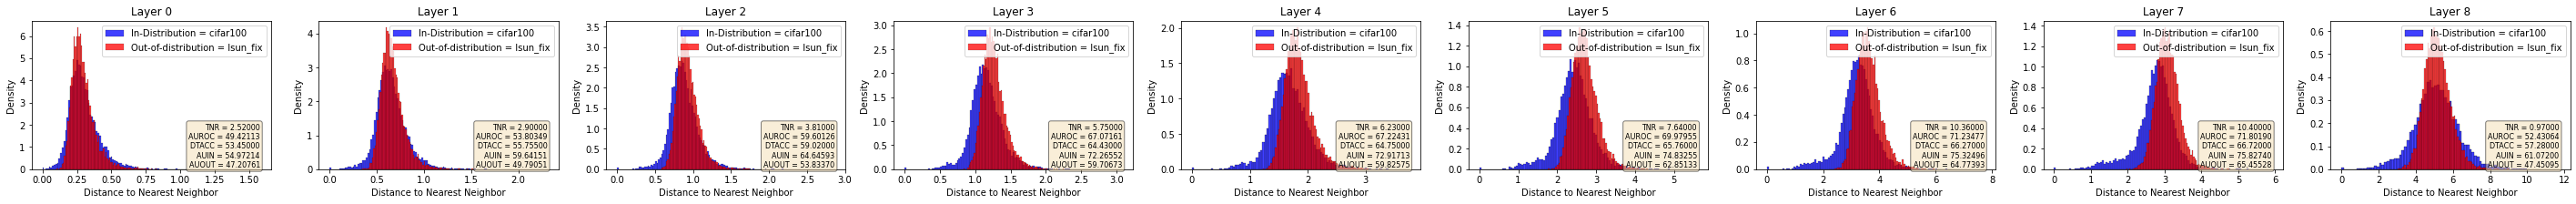

In [11]:
ood_index=1
fig,axs=plt.subplots(1,layer_num,figsize=(50,3))
results=dict()
for layer in range(layer_num):
    results[layer],_,_ = callog.metric(-ind_nn[layer].numpy(),-ood_nn[layer][ood_index].numpy())
    print(results[layer])
    sns.histplot(ax=axs[layer],data=ind_nn[layer],color='blue',stat='density')
    sns.histplot(ax=axs[layer],data=ood_nn[layer][ood_index],color='red',stat='density')
    axs[layer].legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
    axs[layer].set_title('Layer '+str(layer))
    axs[layer].set_xlabel('Distance to Nearest Neighbor')

    rst = results[layer]['TMP']
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
    axs[layer].text(np.max((np.max(ind_nn[layer].numpy()),np.max(ood_nn[layer][ood_index].numpy()))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)

In [12]:
from sklearn.preprocessing import StandardScaler
ind_nn_scaled=[]
ood_nn_scaled=dict()
for j in range(len(ood_dataset)):
    ood_nn_scaled[j]=[]

for i in range(layer_num):
    scaler=StandardScaler()
    scaler.fit(ind_train_nn[i].numpy().reshape(-1,1))
    ind_nn_scaled.append(scaler.transform(ind_nn[i].numpy().reshape(-1,1)).reshape(-1))
    for j in range(len(ood_dataset)):
        ood_nn_scaled[j].append(scaler.transform(ood_nn[i][j].numpy().reshape(-1,1)).reshape(-1))

In [13]:
from sklearn.preprocessing import StandardScaler
ind_scaled=[]
ood_scaled=dict()
for j in range(len(ood_dataset)):
    ood_scaled[j]=[]

for i in range(layer_num):
    scaler=StandardScaler()
    scaler.fit(ind_train[i].reshape(-1,1))
    ind_scaled.append(scaler.transform(ind[i].reshape(-1,1)).reshape(-1))
    for j in range(len(ood_dataset)):
        ood_scaled[j].append(scaler.transform(ood[i][j].reshape(-1,1)).reshape(-1))

In [14]:
ind_scaled_max=np.min(ind_scaled,0)
ood_scaled_max=[]
for j in range(len(ood_dataset)):
    ood_scaled_max.append(np.min(ood_scaled[j],0))

In [15]:
ind_nn_scaled_max=np.max(ind_nn_scaled,0)
ood_nn_scaled_max=[]
for j in range(len(ood_dataset)):
    ood_nn_scaled_max.append(np.max(ood_nn_scaled[j],0))

{'TMP': {'TNR': 0.015941917639827885, 'AUROC': 0.44461278042409347, 'DTACC': 0.5096927473878303, 'AUIN': 0.27620104532017287, 'AUOUT': 0.6709009736166782}}
{'TMP': {'TNR': 0.296980639213276, 'AUROC': 0.8366501959127228, 'DTACC': 0.7665253534111863, 'AUIN': 0.7183901809401949, 'AUOUT': 0.9083387680684945}}
{'TMP': {'TNR': 0.36812384757221883, 'AUROC': 0.865820405654579, 'DTACC': 0.7916907805777504, 'AUIN': 0.7748239402371193, 'AUOUT': 0.9220789631552971}}
{'TMP': {'TNR': 0.7640596189305471, 'AUROC': 0.9601325637676706, 'DTACC': 0.9029808543331285, 'AUIN': 0.9319359476897909, 'AUOUT': 0.978556347148752}}
{'TMP': {'TNR': 0.8976644130301168, 'AUROC': 0.9788042870313461, 'DTACC': 0.9350618315918868, 'AUIN': 0.964717647370273, 'AUOUT': 0.9886988002827425}}
{'TMP': {'TNR': 0.8958973570989551, 'AUROC': 0.9786925015365703, 'DTACC': 0.9357032882606023, 'AUIN': 0.9654407860089278, 'AUOUT': 0.9883082672797081}}
{'TMP': {'TNR': 0.8423478795328826, 'AUROC': 0.9708190419483713, 'DTACC': 0.92077980946

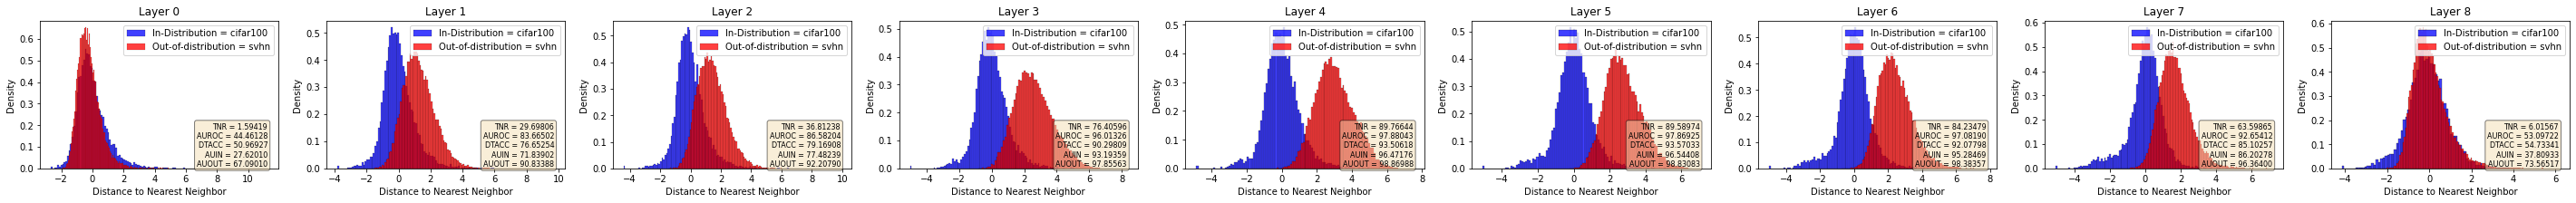

In [16]:
ood_index=0
fig,axs=plt.subplots(1,layer_num,figsize=(50,3))
results=dict()
for layer in range(layer_num):
    results[layer],_,_ = callog.metric(-ind_nn_scaled[layer],-ood_nn_scaled[ood_index][layer])
    print(results[layer])
    sns.histplot(ax=axs[layer],data=ind_nn_scaled[layer],color='blue',stat='density')
    sns.histplot(ax=axs[layer],data=ood_nn_scaled[ood_index][layer],color='red',stat='density')
    axs[layer].legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
    axs[layer].set_title('Layer '+str(layer))
    axs[layer].set_xlabel('Distance to Nearest Neighbor')

    rst = results[layer]['TMP']
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
    axs[layer].text(np.max((np.max(ind_nn_scaled[layer]),np.max(ood_nn_scaled[ood_index][layer]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)

lsun_fix
{'TMP': {'TNR': 0.03200000000000003, 'AUROC': 0.59672708, 'DTACC': 0.5961, 'AUIN': 0.6604295174365387, 'AUOUT': 0.5342906230682403}}


Text(0.5, 0, 'Nearest Neighbor Distance')

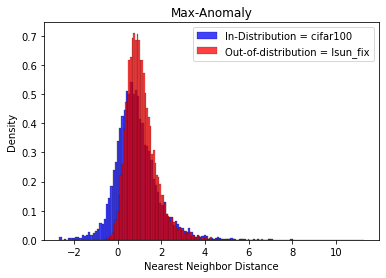

In [17]:
ood_index= 1
print(ood_dataset[ood_index])
results_max,_,_ = callog.metric(-ind_nn_scaled_max,-ood_nn_scaled_max[ood_index])
print(results_max)
sns.histplot(data=ind_nn_scaled_max,color='blue',stat='density')
sns.histplot(data=ood_nn_scaled_max[ood_index],color='red',stat='density')
plt.legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
plt.title('Max-Anomaly')
plt.xlabel('Nearest Neighbor Distance')

# rst = results_max['TMP']
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
# print("{:.2f} / {:.2f} / {:.2f}".format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC']))
# plt.text(np.max((np.max(-ind_scaled_max),np.max(-ood_scaled_max[ood_index]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)

svhn
{'TMP': {'TNR': 0.9463352796558082, 'AUROC': 0.9872875960356485, 'DTACC': 0.9494065765212046, 'AUIN': 0.9773168364035397, 'AUOUT': 0.9938548224843974}}


Text(0.5, 0, 'Reconstruction Error per layer')

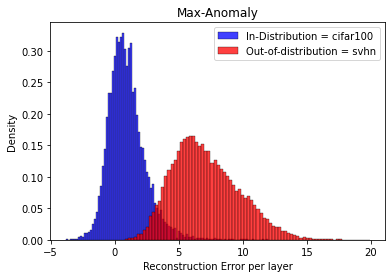

In [18]:
ood_index= 0
cf1 = 1
print(ood_dataset[ood_index])
results_max,_,_ = callog.metric((-ind_nn_scaled_max+ind_scaled_max),(-ood_nn_scaled_max[ood_index]+ood_scaled_max[ood_index]))
print(results_max)
sns.histplot(data=(+ind_nn_scaled_max-ind_scaled_max),color='blue',stat='density')
sns.histplot(data=(+ood_nn_scaled_max[ood_index]-ood_scaled_max[ood_index]),color='red',stat='density')
plt.legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
plt.title('Max-Anomaly')
plt.xlabel('Reconstruction Error per layer')

# rst = results_max['TMP']
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
# print("{:.2f} / {:.2f} / {:.2f}".format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC']))
# plt.text(np.max((np.max(-ind_scaled_max),np.max(-ood_scaled_max[ood_index]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)

lsun_fix
{'TMP': {'TNR': 0.06610000000000005, 'AUROC': 0.66583601, 'DTACC': 0.6262000000000001, 'AUIN': 0.6882879820594316, 'AUOUT': 0.6039050709067808}}


Text(0.5, 0, 'Reconstruction Error per layer')

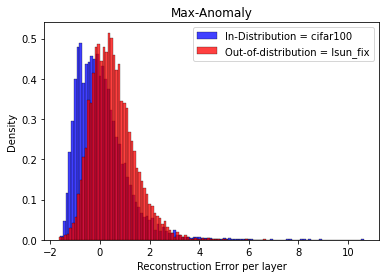

In [19]:
ood_index= 1
print(ood_dataset[ood_index])
results_max,_,_ = callog.metric(ind_scaled_max,ood_scaled_max[ood_index])
print(results_max)
sns.histplot(data=-ind_scaled_max,color='blue',stat='density')
sns.histplot(data=-ood_scaled_max[ood_index],color='red',stat='density')
plt.legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
plt.title('Max-Anomaly')
plt.xlabel('Reconstruction Error per layer')

# rst = results_max['TMP']
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
# print("{:.2f} / {:.2f} / {:.2f}".format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC']))
# plt.text(np.max((np.max(-ind_scaled_max),np.max(-ood_scaled_max[ood_index]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)

In [26]:
ood_final=[]
cf1 =100
cf2= 1
ind_final=1*(-ind_scaled_max+cf2*ind_nn_scaled_max)-(test_ind_norm[layer_num+1])*cf1
# ind_final=ind_scaled_max/(test_ind_norm[layer_num-1])


for j in range(len(ood_dataset)):
    ood_final.append(
#         -(ood_nn_scaled_max[j])+(test_ood_norm[layer_num-1][j])+ood_scaled_max[j]
        1*(-ood_scaled_max[j]+cf2*ood_nn_scaled_max[j])-(test_ood_norm[layer_num+1][j])*cf1
    )    

In [27]:
ood_index= 0
print(ood_dataset[ood_index])
results_max,_,_ = callog.metric(-ind_final,-ood_final[ood_index])
print(results_max)
# sns.histplot(data=ind_final,color='blue',stat='density')
# sns.histplot(data=ood_final[ood_index],color='red',stat='density')
# plt.legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
# plt.title('Max-Anomaly')
# plt.xlabel('Reconstruction Error per layer')
ood_index= 1
print(ood_dataset[ood_index])
results_max,_,_ = callog.metric(-ind_final,-ood_final[ood_index])
print(results_max)

ood_index= 2
print(ood_dataset[ood_index])
results_max,_,_ = callog.metric(-ind_final,-ood_final[ood_index])
print(results_max)

ood_index= 3
print(ood_dataset[ood_index])
results_max,_,_ = callog.metric(-ind_final,-ood_final[ood_index])
print(results_max)

ood_index= 4
print(ood_dataset[ood_index])
results_max,_,_ = callog.metric(-ind_final,-ood_final[ood_index])
print(results_max)


svhn
{'TMP': {'TNR': 0.531038721573448, 'AUROC': 0.9207203480331898, 'DTACC': 0.8513914566687154, 'AUIN': 0.8730324831049233, 'AUOUT': 0.9576273339909088}}
lsun_fix
{'TMP': {'TNR': 0.15559999999999996, 'AUROC': 0.7391165999999999, 'DTACC': 0.67845, 'AUIN': 0.7567203662257744, 'AUOUT': 0.6969526182904711}}
imagenet_fix
{'TMP': {'TNR': 0.2198, 'AUROC': 0.77711284, 'DTACC': 0.7084, 'AUIN': 0.7843138337489907, 'AUOUT': 0.7462165997172397}}
lsun_resize
{'TMP': {'TNR': 0.11499999999999999, 'AUROC': 0.71082754, 'DTACC': 0.6616, 'AUIN': 0.7597820504028532, 'AUOUT': 0.6575970477783648}}
imagenet_resize
{'TMP': {'TNR': 0.10140000000000005, 'AUROC': 0.6540944, 'DTACC': 0.6294500000000001, 'AUIN': 0.7119882017875241, 'AUOUT': 0.6119697997012432}}
